# TOPICS
- Data Cleaning
    - Correcting data types
    - Removing duplicates
    - Missing value treatment
    - Outlier Treatment
- Data Transformation



### Data Dictionary:
- Income: The annual income of Car owners in Dollars as the data shared is of US manufacturing company
- Marital Status: The car owner is married or not
- Sex: The car owner is male or female
- Education: QUalification of car owner
- Job: What type of job the car owners do
- Use: what is the purpose or use of buying the car 
- Miles Clocked: how much does the car has traveled
- Car type: What type of car the car owner's have
- Car Age: How old is the car
- City: Where does the car owner's live
- Region: In which region does the car owner belongs to

# Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data set

In [39]:
df=pd.read_excel('13. EDA_Cars_Data.xlsx')

# Basic Data Exploration 

In [43]:
df.head(8)

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,?,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10,Texas,42420.0
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5,Texas,42420.0
6,7,87460.05269,No,M,High School,Manager,45.000488,NaN,15420.0,Minivan,1,Texas,42420.0
7,8,NaN,Yes,F,?,Blue Collar,15.665947,NaN,11290.0,Sports Car,1,Texas,NaN


## Observations:
* There are null values in data set
* 'Car age" might be having wrong entries like "?"

In [35]:
df.shape

(303, 13)

#### Observations:
* The number of columns in our dataset is 13
* The number of rows in our dataset is 303

In [45]:
df['EDUCATION'].unique()

array(['Bachelors', 'High School', nan, '?', 'Masters', 'PhD'],
      dtype=object)

In [47]:
df['EDUCATION'].value_counts()

EDUCATION
High School    160
Bachelors       54
Masters         38
PhD              6
?                1
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    object 
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 30.9+ KB


In [ ]:
df.dtypes

### Observations:
* Features are having null values
* The data type of 'Car age" should be integer but it is appearing as object, so we need to check that.
* Data type of Postal code

In [59]:
df[df['INCOME']==0]['JOB']

23     Home Maker
24        Student
34            NaN
40     Home Maker
66        Student
94     Home Maker
95     Home Maker
103       Student
125    Home Maker
140       Student
142       Student
143    Home Maker
144       Student
173    Home Maker
201    Home Maker
207           NaN
251       Student
255    Home Maker
259    Home Maker
265       Student
273       Student
285       Student
288    Home Maker
297       Student
302       Student
Name: JOB, dtype: object

In [85]:
df.groupby('CITY')[['TRAVEL TIME','MILES CLOCKED']].sum().sort_values(by='MILES CLOCKED')

,TRAVEL TIME,MILES CLOCKED
CITY,,
Philadelphia,13.662860,15090.0
New Albany,571.666372,198690.0
Texas,585.954173,250430.0
New York City,718.631446,312240.0
Los Angeles,1108.300391,316040.0
Columbia,699.227461,320980.0
Houston,824.297651,412110.0
San Francisco,750.613961,418570.0
Washington,985.730180,447300.0


In [81]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,?,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10,Texas,42420.0


In [63]:
df['CITY'].value_counts()

CITY
Houston          39
Las Vegas        39
Seattle          36
Los Angeles      33
Washington       32
Columbia         28
San Francisco    27
New York City    23
Texas            22
New Albany       17
Philadelphia      1
Name: count, dtype: int64

In [49]:
df.describe()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,POSTAL CODE
count,303.000000,260.000000,262.000000,278.000000,300.000000
mean,139.640264,50025.162170,34.282098,13591.978417,50712.196667
std,85.178422,41186.807914,14.910178,7167.328655,24141.029290
min,1.000000,0.000000,5.000000,1500.000000,11435.000000
25%,62.500000,20452.885023,24.449874,7900.000000,42420.000000
50%,138.000000,44571.590870,33.564757,12065.000000,47150.000000
75%,213.500000,66485.761387,43.907339,18240.000000,61701.000000
max,289.000000,204667.589700,83.617643,38000.000000,90049.000000


### Observations:
* The minimum value of "INCOME" is 0. We need to check the validity of data with people having zero income and having vehicles.

In [ ]:
df[df['INCOME']==0]

#### Observations:
* All the people with no income are either householders or students. So, the entries appear to be genuine.

# Data Cleaning

## 1- Correcting data types

In [87]:
 # Converting Postel Code into object
df["POSTAL CODE"]= df['POSTAL CODE'].astype('object') 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    object 
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 30.9+ KB


## 2-Duplicate values 

In [91]:
# Checking for number of duplicate rows
df.duplicated().sum()

13

In [95]:
# Dropping the duplicate rows
df.drop_duplicates(inplace=True) 

In [97]:
# Now, check for duplicate data
df.duplicated().sum()

0

In [ ]:
# Now the number of rows has been reduced by 13
df.shape

# 3-Invalid values/ Wrong Entries

In [99]:
# Checking unique values in 'CAR AGE'
df['CAR AGE'].unique()

array([7, 1, '?', 11, 10, 5, nan, 6, 13, 4, 15, 3, 8, 14, 20, 16, 17, 12,
       9, 18, 19], dtype=object)

In [103]:
df['CAR AGE'].value_counts()

CAR AGE
1     97
10    21
8     21
6     19
7     16
11    15
9     12
5     12
4     11
12     7
14     6
20     6
3      5
16     4
13     4
18     4
15     3
17     3
?      3
19     1
Name: count, dtype: int64

In [101]:
# Getting rows with 'CAR AGE' as "?"
df[df['CAR AGE']=='?']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,?,Texas,42420.0
82,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,?,Los Angeles,90049.0
113,100,NaN,No,F,Masters,NaN,42.376470,Commercial,24410.0,Pickup,?,San Francisco,55106.0


In [107]:
# Replacing "?" with null values
df["CAR AGE"]=df["CAR AGE"].replace('?',np.nan)

C:\Users\ashwani1\AppData\Local\Temp\ipykernel_16788\2184239072.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CAR AGE"]=df["CAR AGE"].replace('?',np.nan)


In [ ]:
df['CAR AGE'].unique()

In [109]:
df[df['CAR AGE']=='?']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


# 4-Missing values / Null Values

In [ ]:
# to fetch all the rows having atleast one Null value
df[df.isnull().sum(axis=1)>0]

In [ ]:
# Check for missing values in columns
df.isnull().sum()

In [111]:
# Check for percentage wise missing values in columns
df.isnull().sum()/len(df)*100

INDEX              0.000000
INCOME            14.827586
MARITAL STATUS     9.655172
SEX                2.068966
EDUCATION         15.172414
JOB               15.862069
TRAVEL TIME       14.137931
USE               18.275862
MILES CLOCKED      8.620690
CAR TYPE           3.448276
CAR AGE            7.931034
CITY               2.068966
POSTAL CODE        1.034483
dtype: float64

####  There are various ways of treating your missing values in the data set. And which technique to use differ case to case:

* Drop the missing values
* Impute with mean value :Before replacing with mean value, check that the variable shouldn't have extreme values .i.e. outliers.
* Impute with median value : In case we have extreme values it is advisable to use median approach.
* Impute with mode value : For categorical column, we can replace the missing values with mode values i.e the frequent ones.
    

**First check for the outliers**

In [137]:
Q1= df["INCOME"].quantile(0.25)
Q3= df["INCOME"].quantile(0.75)
IQR=Q3-Q1
lower_fence= Q1- 1.5*IQR
upper_fence= Q3 + 1.5* IQR

In [139]:
Q1, Q3

(18591.515659999997, 69382.95116)

In [143]:
df["INCOME"].median()

40248.26086

In [135]:
df[df["CAR AGE"]> upper_fence]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [ ]:
df["INCOME"]> upper_fence

<Figure size 500x300 with 0 Axes>

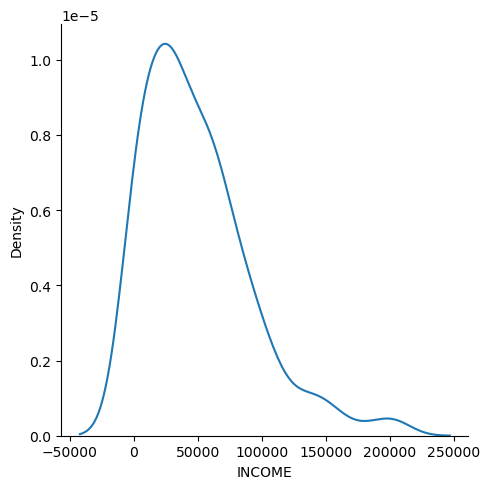

<Figure size 500x300 with 0 Axes>

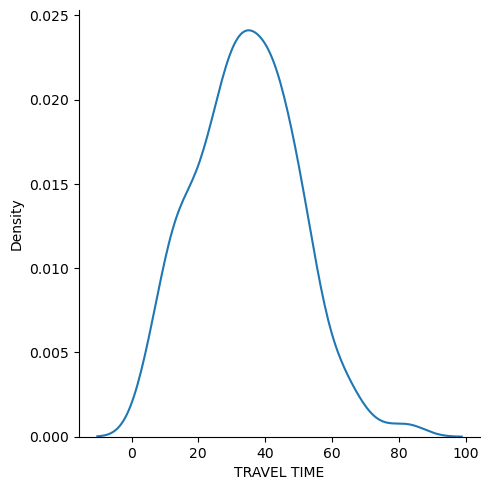

<Figure size 500x300 with 0 Axes>

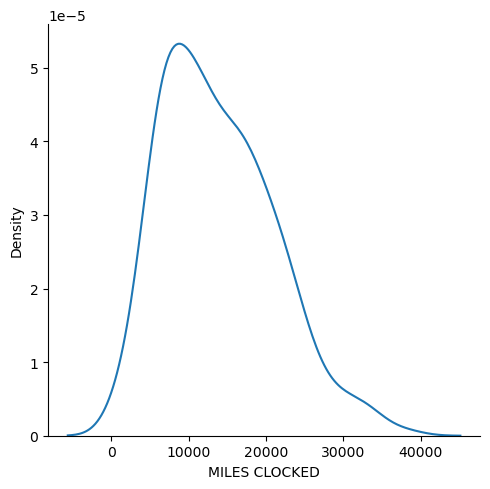

<Figure size 500x300 with 0 Axes>

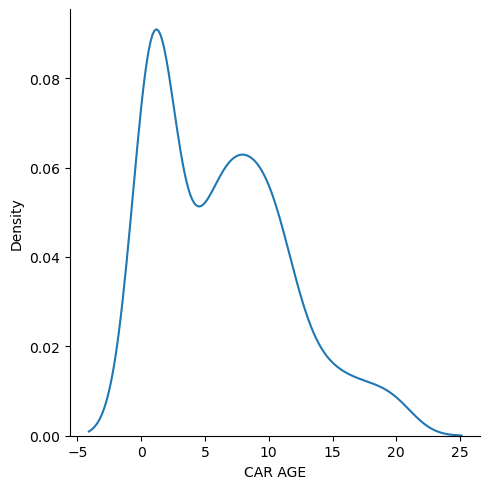

In [149]:
for i in ["INCOME","TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(5,3))
    sns.displot(data=df,x=i,kind='kde' )
    plt.show()

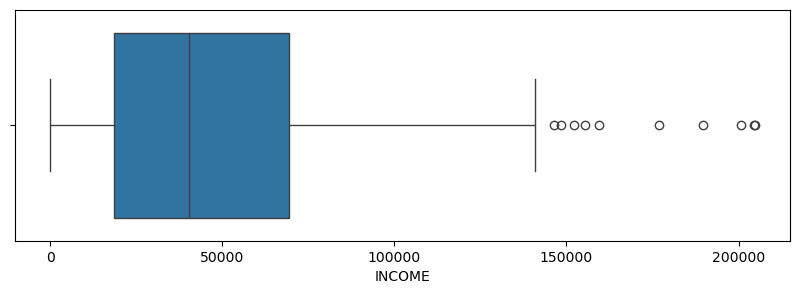

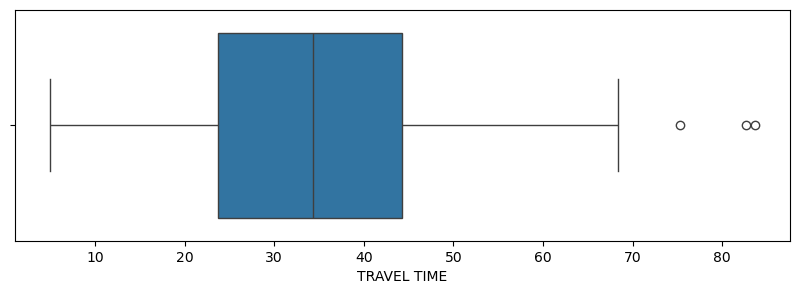

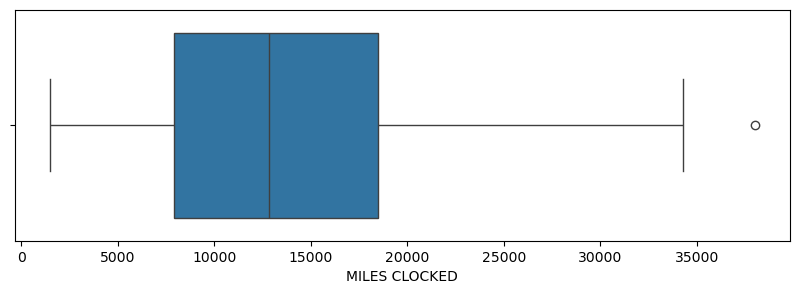

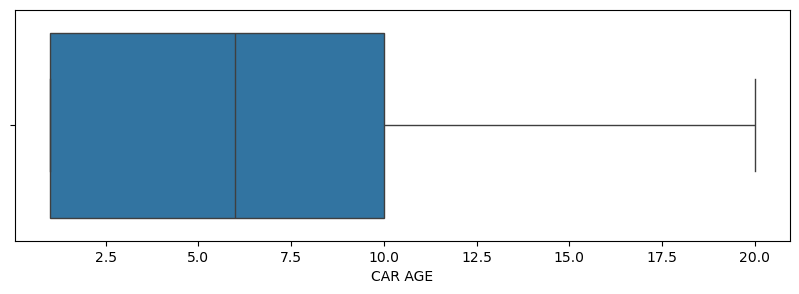

In [113]:
for i in ["INCOME","TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df,x=i)
    plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [ ]:
ll,ul=remove_outlier(df['INCOME'])

In [ ]:
df[df['INCOME']>ul]

In [ ]:
df[df['INCOME']<ll]

** Since, Outliers are present so Replacing NULL values in Numerical Columns using Median**

In [ ]:
median1=df["INCOME"].median()
median2=df["TRAVEL TIME"].median()
median3=df["MILES CLOCKED"].median()
median4=df["CAR AGE"].median()

df["INCOME"].replace(np.nan,median1,inplace=True)
df["TRAVEL TIME"].replace(np.nan,median2,inplace=True)
df["MILES CLOCKED"].replace(np.nan,median3,inplace=True)
df["CAR AGE"].replace(np.nan,median4,inplace=True)

**Replacing NULL values in Categorical Columns using Mode**

In [ ]:
mode1=df["SEX"].mode().values[0]
mode2=df["MARITAL STATUS"].mode().values[0]
mode3=df["EDUCATION"].mode().values[0]
mode4=df["JOB"].mode().values[0]
mode5=df["USE"].mode().values[0]
mode6=df['CITY'].mode().values[0]
mode7=df["CAR TYPE"].mode().values[0]
mode8=df["POSTAL CODE"].mode().values[0]

df["SEX"]=df["SEX"].replace(np.nan,mode1)
df["MARITAL STATUS"]= df["MARITAL STATUS"].replace(np.nan,mode2)
df["EDUCATION"]=df["EDUCATION"].replace(np.nan,mode3)
df["JOB"]=df["JOB"].replace(np.nan,mode4)
df["USE"]=df["USE"].replace(np.nan,mode5)
df["CAR TYPE"]=df["CAR TYPE"].replace(np.nan,mode7)
df['CITY']=df['CITY'].replace(np.nan,mode6)
df['POSTAL CODE']=df['POSTAL CODE'].replace(np.nan,mode8)

In [ ]:
# Check for missing value in any column
df.isnull().sum()

# 5- Outlier Treatment

In [ ]:
# Checking Outliers
for i in ["INCOME","TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    df.boxplot(column=i)
    plt.show()

#### Looking at the box plot, it seems that the three variables INCOME, MILES CLOCKED and TRAVEL TIME have outlier present in the variables.
- There are several ways of treating them:
    - 1- Check if outliers are genuine values.
    - 2- If not, Drop the outlier value.
    - 3- OR Replace the outlier values using the IQR Or Percentiles

**Creating a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

for i in df.columns:
    if df[i].dtype !='object':
        lr,ur=remove_outlier(df[i])
        df[i]=np.where(df[i]>ur,ur,df[i])
        df[i]=np.where(df[i]<lr,lr,df[i])

In [ ]:
# Replacing outliers with lower and upper ranges
lrincome,urincome=remove_outlier(df['INCOME'])
df['INCOME']=np.where(df['INCOME']>urincome,urincome,df['INCOME'])
df['INCOME']=np.where(df['INCOME']<lrincome,lrincome,df['INCOME'])


lrtravel,urtravel=remove_outlier(df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']>urtravel,urtravel,df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']<lrtravel,lrtravel,df['TRAVEL TIME'])

lrmiles,urmiles=remove_outlier(df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']>urmiles,urmiles,df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']<lrmiles,lrmiles,df['MILES CLOCKED'])


### Boxplots after Outlier Treatment

In [ ]:
for i in ["INCOME","TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    df.boxplot(column=i)
    plt.show()

**If you look at the box plots above,post treating the outlier there are no outliers in all these columns.**

# Data Transformation

In [ ]:
from scipy import stats

In [ ]:
df.head()

### 1-Normalization
* Feature Normalization is the method used to change the shape of features of data.

In [ ]:
for i in ["TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df[i])
    plt.show()

In [ ]:
df_normalize=df.copy()
df_normalize['TRAVEL TIME']=stats.boxcox(df_normalize['TRAVEL TIME'])[0]
df_normalize['CAR AGE'] = stats.boxcox(df_normalize['CAR AGE'])[0]
df_normalize['MILES CLOCKED']= stats.boxcox(df_normalize['MILES CLOCKED'])[0]

In [ ]:
df_normalize['CAR AGE'].describe()

In [ ]:
for i in ["TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df_normalize[i])
    plt.show()

### 2-Scaling
* Scaling is the method used to change the range of features of data.
* If the data in variables are of different scales, it is tough to compare these variables.
* Z-Score or Standard Score.
* Min-Max Scaling


In [ ]:
df['INCOME'].describe().round(4)

In [ ]:
df_scaled['INCOME'].describe()

In [ ]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

In [ ]:
df_scaled=df.copy()
df_scaled['INCOME'] = std_scale.fit_transform(df_scaled[['INCOME']])
#df_scaled['TRAVEL TIME'] = std_scale.fit_transform(df_scaled[['TRAVEL TIME']])
#df_scaled['CAR AGE'] = std_scale.fit_transform(df_scaled[['CAR AGE']])
#df_scaled['MILES CLOCKED']= std_scale.fit_transform(df_scaled[['MILES CLOCKED']])

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(df_scaled['INCOME'])

plt.subplot(1,2,2)
sns.kdeplot(df['INCOME'])


In [ ]:
df_scaled['INCOME'].describe().round(4)

**INCOME, TRAVEL TIME and CAR AGE, to one scale now.**

# *******************************************************************